[4512 3738 4261 3777 4177] [1530 1297 1335 1282 1590]
Mean of x and y: 3633.9915611814345 1282.873417721519
Slope (m): 0.2634293394893993 Intercept (c): 325.5734210494428


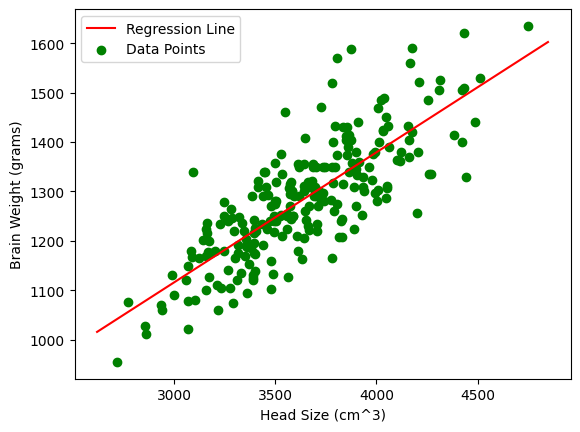

Manual R^2 score: 0.639311719957
Sklearn R^2 score: 0.639311719957


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('C://Users//Admin//Downloads//archive (3)//headbrain.csv')

# Extract features and labels
x = np.array(data['Head Size(cm^3)'])
y = np.array(data['Brain Weight(grams)'])

print(x[:5], y[:5])  # First 5 values

# Function to fit regression line
def get_line(x, y):
    x_m, y_m = np.mean(x), np.mean(y)
    print("Mean of x and y:", x_m, y_m)
   
    x_d, y_d = x - x_m, y - y_m
    m = np.sum(x_d * y_d) / np.sum(x_d ** 2)
    c = y_m - (m * x_m)
    print("Slope (m):", m, "Intercept (c):", c)
   
    return lambda x: m * x + c

# Get regression function
lin = get_line(x, y)

# Plotting
X = np.linspace(np.min(x) - 100, np.max(x) + 100, 1000)
Y = np.array([lin(val) for val in X])

plt.plot(X, Y, color='red', label='Regression Line')
plt.scatter(x, y, color='green', label='Data Points')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

# Function to compute R^2 score manually
def get_error(line_func, x, y):
    y_m = np.mean(y)
    y_pred = np.array([line_func(_) for _ in x])
   
    ss_t = np.sum((y - y_m) ** 2)
    ss_r = np.sum((y - y_pred) ** 2)
   
    r2 = 1 - (ss_r / ss_t)
    return r2

# Print R^2 from manual method
print("Manual R^2 score:", get_error(lin, x, y))

# Using sklearn LinearRegression
from sklearn.linear_model import LinearRegression

x_reshaped = x.reshape((len(x), 1))  # Reshape to 2D for sklearn
reg = LinearRegression()
reg.fit(x_reshaped, y)

print("Sklearn R^2 score:", reg.score(x_reshaped, y))